<a href="https://colab.research.google.com/github/bahramzada/ferrum-capital-task-1/blob/main/Ferrum_Capital_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Giriş

Bu notebook-da sentiment analysis tapşırığı üçün təqdim edilmiş dataset üzərində ilkin araşdırmalar (Exploratory Data Analysis – EDA) aparılmışdır. Məqsəd dataset-in strukturu, emosiyaların paylanması və mətn xüsusiyyətləri haqqında ümumi təsəvvür əldə etməkdir.


In [ ]:
!wget https://raw.githubusercontent.com/bahramzada/ferrum-capital-task-1/refs/heads/main/data/test.csv
!wget https://raw.githubusercontent.com/bahramzada/ferrum-capital-task-1/refs/heads/main/data/training.csv
!wget https://raw.githubusercontent.com/bahramzada/ferrum-capital-task-1/refs/heads/main/data/validation.csv

--2026-01-28 09:59:11--  https://raw.githubusercontent.com/bahramzada/ferrum-capital-task-1/refs/heads/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201183 (196K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 196.47K  --.-KB/s    in 0.02s   

2026-01-28 09:59:11 (7.78 MB/s) - ‘test.csv.1’ saved [201183/201183]

--2026-01-28 09:59:11--  https://raw.githubusercontent.com/bahramzada/ferrum-capital-task-1/refs/heads/main/data/training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("training.csv")
val_df = pd.read_csv("validation.csv")
test_df = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (16000, 2)
Validation shape: (2000, 2)
Test shape: (2000, 2)


## Dataset strukturu

Dataset train, validation və test olmaqla üç hissəyə bölünmüşdür. Bu bölgü modelin öyrədilməsi, yoxlanılması və yekun qiymətləndirilməsi mərhələlərinin bir-birindən ayrılması üçün istifadə olunur.


In [ ]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
train_df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [ ]:
test_df['label'].value_counts()

,count
label,
1,695
0,581
3,275
4,224
2,159
5,66


In [ ]:
val_df['label'].value_counts()

,count
label,
1,704
0,550
3,275
4,212
2,178
5,81


## Emosiyaların paylanması

Bu hissədə train, validation və test setləri üzrə emosiyaların paylanması analiz edilmişdir. Sinif paylanmasının balanslı olub-olmaması modelin öyrənmə keyfiyyətinə birbaşa təsir göstərə bilər.


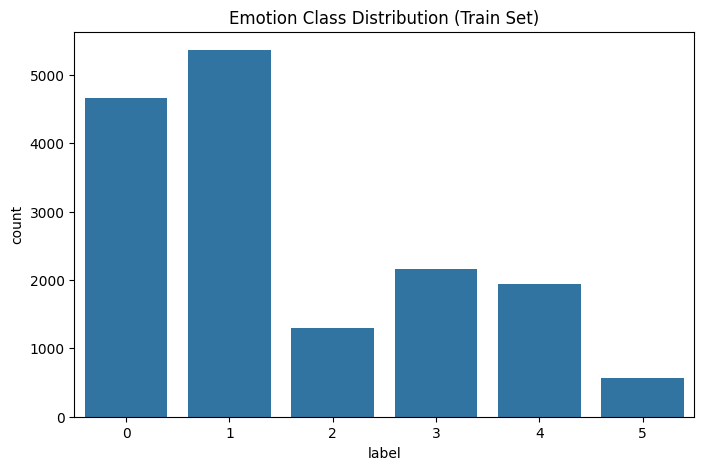

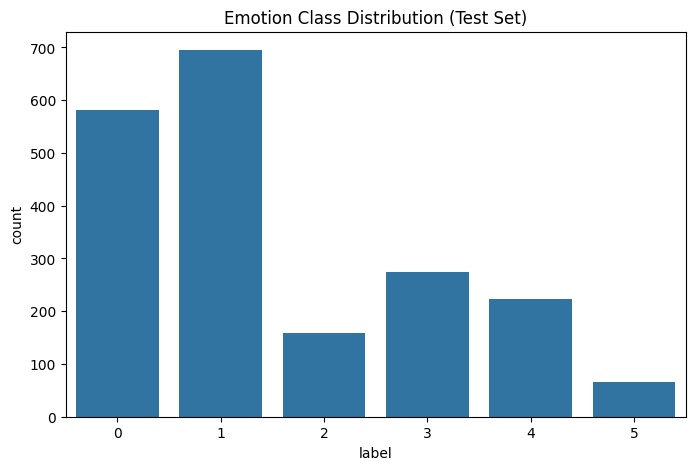

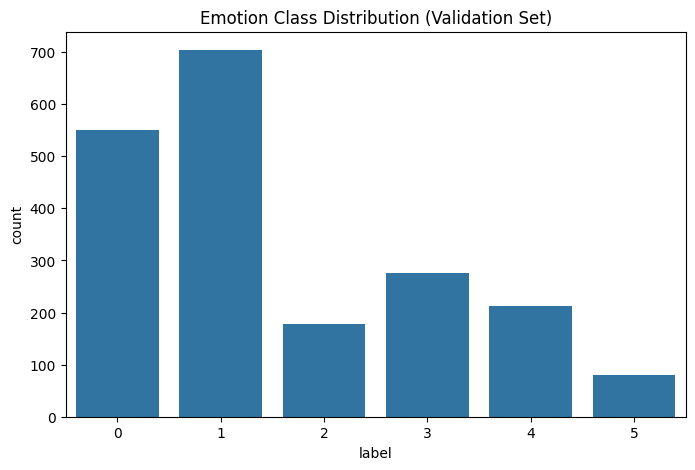

In [ ]:
# Train set
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_df)
plt.title("Emotion Class Distribution (Train Set)")
plt.xticks(rotation=0)
plt.show()

# Test set
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=test_df)
plt.title("Emotion Class Distribution (Test Set)")
plt.xticks(rotation=0)
plt.show()

# Validation set
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=val_df)
plt.title("Emotion Class Distribution (Validation Set)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
train_df['text_length'] = train_df['text'].apply(len)

train_df['text_length'].describe()

,text_length
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [ ]:
train_df.groupby('label')['text_length'].mean().sort_values()

,text_length
label,
0,92.550579
4,96.123903
3,96.911533
1,98.554457
5,101.676573
2,104.033742


## Mətn uzunluqlarının analizi

Aparılan analiz göstərir ki, mətnlərin böyük əksəriyyəti qısa və orta uzunluqludur. Bu xüsusiyyət klassik machine learning modelləri və TF-IDF əsaslı yanaşmalar üçün uyğundur.